In [1]:
# https://github.com/simonneutert/wine_quality_data

In [2]:
# import libs
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set(style="whitegrid", palette="muted")
import numpy as np
import matplotlib.pyplot as plt

In [3]:
white_wine_df = pd.read_csv("../data/winequality-white.csv", sep=";")
red_wine_df = pd.read_csv("../data/winequality-red.csv", sep=";")

In [4]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white_wine_df['color'] = "white"
red_wine_df['color'] = 'red'
white_wine_df["color"] = white_wine_df["color"].astype("category")
red_wine_df["color"] = red_wine_df["color"].astype("category")

In [7]:
red_wine_df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

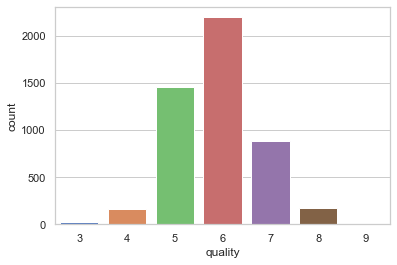

In [8]:
sns.countplot(x="quality", data=white_wine_df)

<AxesSubplot:xlabel='quality', ylabel='count'>

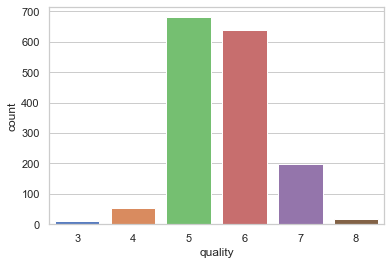

In [9]:
sns.countplot(x="quality", data=red_wine_df)

In [10]:
white_wine_df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [11]:
white_wine_df.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

In [12]:
red_wine_df.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


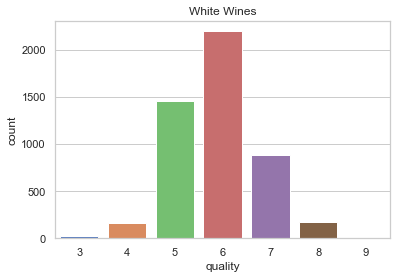

In [13]:
sns.countplot(data=white_wine_df, x="quality")
plt.title("White Wines")
print(white_wine_df.quality.describe())

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


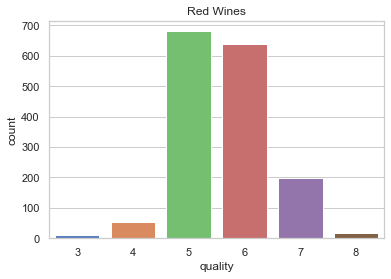

In [14]:
sns.countplot(data=red_wine_df, x="quality")
plt.title("Red Wines")
print(red_wine_df.quality.describe())

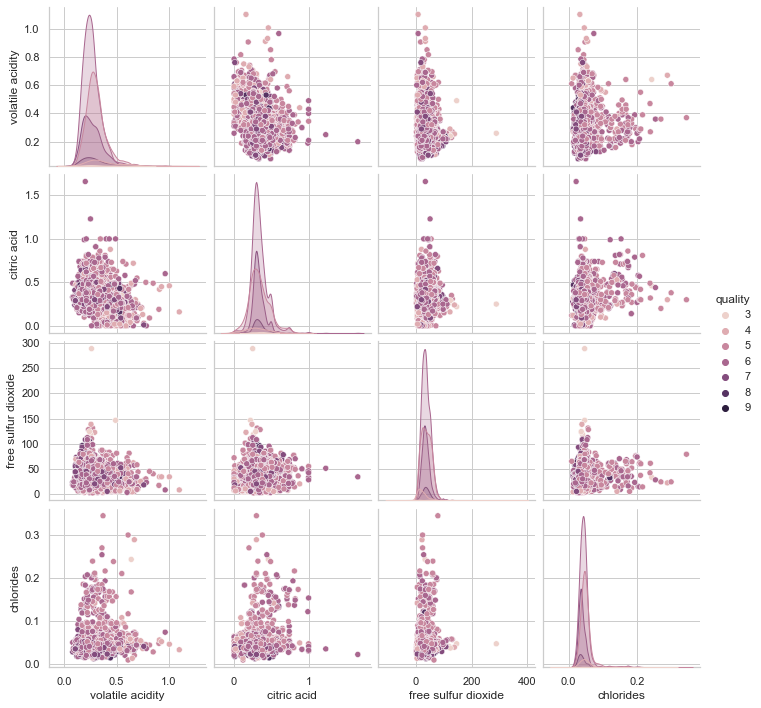

In [15]:
sns.pairplot(white_wine_df[["volatile acidity", "citric acid", "quality",
                            "free sulfur dioxide", "chlorides"]], hue="quality")

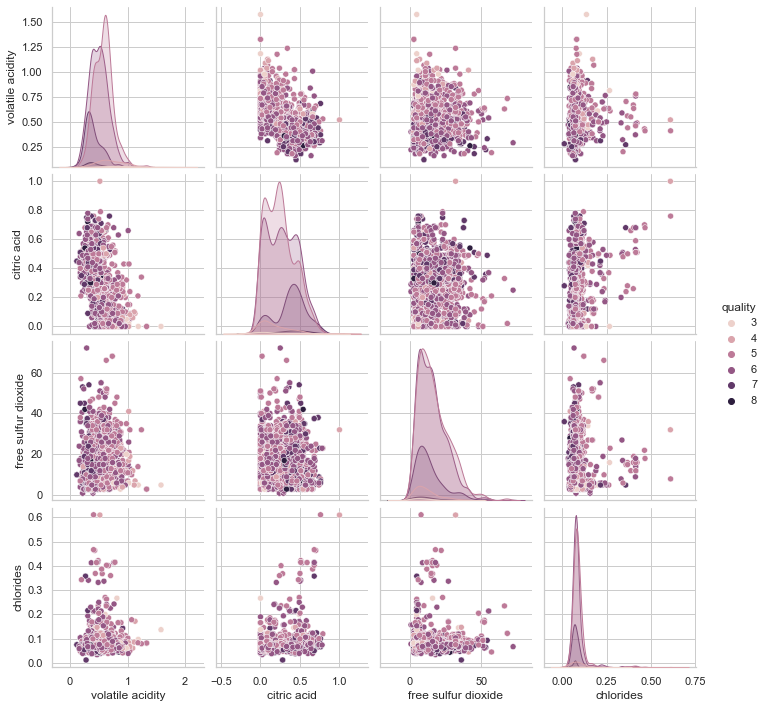

In [16]:
sns.pairplot(red_wine_df[["volatile acidity", "citric acid", "quality",
                            "free sulfur dioxide", "chlorides"]], hue="quality")

# white wine

Due to its smaller size (<1,600 instances), and similar group distribution to the white wine data set, the red wine dataset was therefore not used in this study.

During initial data set exploration, we observed high variance observations and unequal distribution of samples in the quality classes. These issues are predicted to negatively impact the performance of the downstream models, especially the multilayer neural network (i.e., MNN). 

As a result, multiple preprocessing steps were performed, including: z-score normalization of data, outlier removal, re-labeling and coding of class samples, quality class reduction and condensation, and finally, Principal Component Analysis (PCA) as detailed in the following sections.

In [42]:
white_wine_df = pd.read_csv("../data/winequality-white.csv", sep=";")
white_wine_df.columns = white_wine_df.columns.str.replace(' ', '-')
white_wine = white_wine_df

In [43]:
white_wine.shape

(4898, 12)

In [44]:
white_wine = white_wine.dropna()

In [45]:
white_wine.shape

(4898, 12)

In [47]:
white_wine.head(100)

,fixed-acidity,volatile-acidity,citric-acid,residual-sugar,chlorides,free-sulfur-dioxide,total-sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4


To summarize, the raw Wine Quality dataset was transformed using z-score normalization (set mean = 0, standard deviation = 1) across all attributes to place all values on the same scale.

In [18]:
x_columns = ['fixed-acidity', 'volatile-acidity', 'citric-acid', 'residual-sugar',
       'chlorides', 'free-sulfur-dioxide', 'total-sulfur-dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
white_wine[x_columns] = scaler.fit_transform(white_wine[x_columns])

In [19]:
white_wine.head()

,fixed-acidity,volatile-acidity,citric-acid,residual-sugar,chlorides,free-sulfur-dioxide,total-sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6


In [20]:
print(np.mean(np.array(white_wine['fixed-acidity'])))
print(np.array(white_wine['fixed-acidity']).std())

-3.481630391637894e-16
1.0


After normalization, values greater than ±3 standard deviations from the mean for all attributes were removed from the data set.

In [21]:
white_wine.shape

(4898, 12)

In [22]:
from scipy import stats
# white_wine[x_columns][(np.abs(stats.zscore(white_wine[x_columns])) < 3).all(axis=1)].shape

white_wine[x_columns] = white_wine[x_columns][white_wine[x_columns].apply(lambda x :(x-x.mean()).abs()<=(3*x.std()) ).all(1)]

In [23]:
white_wine.shape

(4898, 12)

In [24]:
4898 - 4264

634

Quality groups 3 and 9 were removed due to low number of instances (~1% of dataset) and high variance.

In [25]:
white_wine.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [26]:
white_wine = white_wine[white_wine.quality != 3]
white_wine = white_wine[white_wine.quality != 9]

In [27]:
white_wine.shape

(4873, 12)

In [28]:
white_wine.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
Name: quality, dtype: int64

4 -> 0 (LOW), 5 -> (Below Average), 6 -> 2 (Average) -> (7-8) -> 3 (Above average, High) 

In [29]:
mappings = {
    4: 0,
    5: 1,
    6: 2, 
    7: 3, 
    8: 3
}
white_wine["quality"] = white_wine["quality"].apply(lambda x: mappings[x])

In [30]:
white_wine.head()

,fixed-acidity,volatile-acidity,citric-acid,residual-sugar,chlorides,free-sulfur-dioxide,total-sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,2
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,2
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,2
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,2
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,2


In [38]:
white_wine.quality.value_counts()

2    2198
1    1457
3    1055
0     163
Name: quality, dtype: int64

In [40]:
white_wine.shape

(4873, 12)

In [41]:
white_wine=white_wine.dropna()
white_wine.shape

(4487, 12)

# combined analysis 

In [32]:
ww, rw = white_wine_df.loc[:], red_wine_df.loc[:]
ww["color"], rw["color"] = "white", "red"
wine_df = pd.concat([ww, rw], ignore_index=True)

In [33]:
wine_df.shape

(6497, 19)

In [34]:
wine_df["color"] = wine_df["color"].astype("category")

In [35]:
wine_df.corr()

,fixed-acidity,volatile-acidity,citric-acid,residual-sugar,chlorides,free-sulfur-dioxide,total-sulfur-dioxide,density,pH,sulphates,alcohol,quality,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide
fixed-acidity,1.000000,-0.042620,0.289240,0.083024,0.078077,-0.027073,0.083256,0.254901,-0.400769,-0.015620,-0.108981,-0.088453,NaN,NaN,NaN,NaN,NaN,NaN
volatile-acidity,-0.042620,1.000000,-0.152500,0.056637,0.012628,-0.077484,0.100535,-0.011164,-0.032480,-0.042777,0.086899,-0.139826,NaN,NaN,NaN,NaN,NaN,NaN
citric-acid,0.289240,-0.152500,1.000000,0.088486,0.026603,0.120439,0.121636,0.137905,-0.144679,0.065455,-0.059880,0.004659,NaN,NaN,NaN,NaN,NaN,NaN
residual-sugar,0.083024,0.056637,0.088486,1.000000,0.245245,0.356967,0.419901,0.840197,-0.198567,-0.017471,-0.483377,-0.105691,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,0.078077,0.012628,0.026603,0.245245,1.000000,0.123529,0.327777,0.487502,0.148304,0.136988,0.095477,-0.280515,0.093705,0.061298,0.203823,0.055610,0.005562,0.047400
free-sulfur-dioxide,-0.027073,-0.077484,0.120439,0.356967,0.123529,1.000000,0.616354,0.346123,-0.014037,0.075156,-0.262254,0.025565,NaN,NaN,NaN,NaN,NaN,NaN
total-sulfur-dioxide,0.083256,0.100535,0.121636,0.419901,0.327777,0.616354,1.000000,0.553507,0.005035,0.152558,-0.463261,-0.165411,NaN,NaN,NaN,NaN,NaN,NaN
density,0.254901,-0.011164,0.137905,0.840197,0.487502,0.346123,0.553507,1.000000,0.374983,0.246599,0.329760,-0.303487,0.668047,0.022026,0.364947,0.355283,-0.021946,0.071269
pH,-0.400769,-0.032480,-0.144679,-0.198567,0.148304,-0.014037,0.005035,0.374983,1.000000,0.383186,0.860704,-0.084228,-0.682978,0.234937,-0.541904,-0.085652,0.070377,-0.066495
sulphates,-0.015620,-0.042777,0.065455,-0.017471,0.136988,0.075156,0.152558,0.246599,0.383186,1.000000,0.340786,-0.007189,0.183006,-0.260987,0.312770,0.005527,0.051658,0.042947


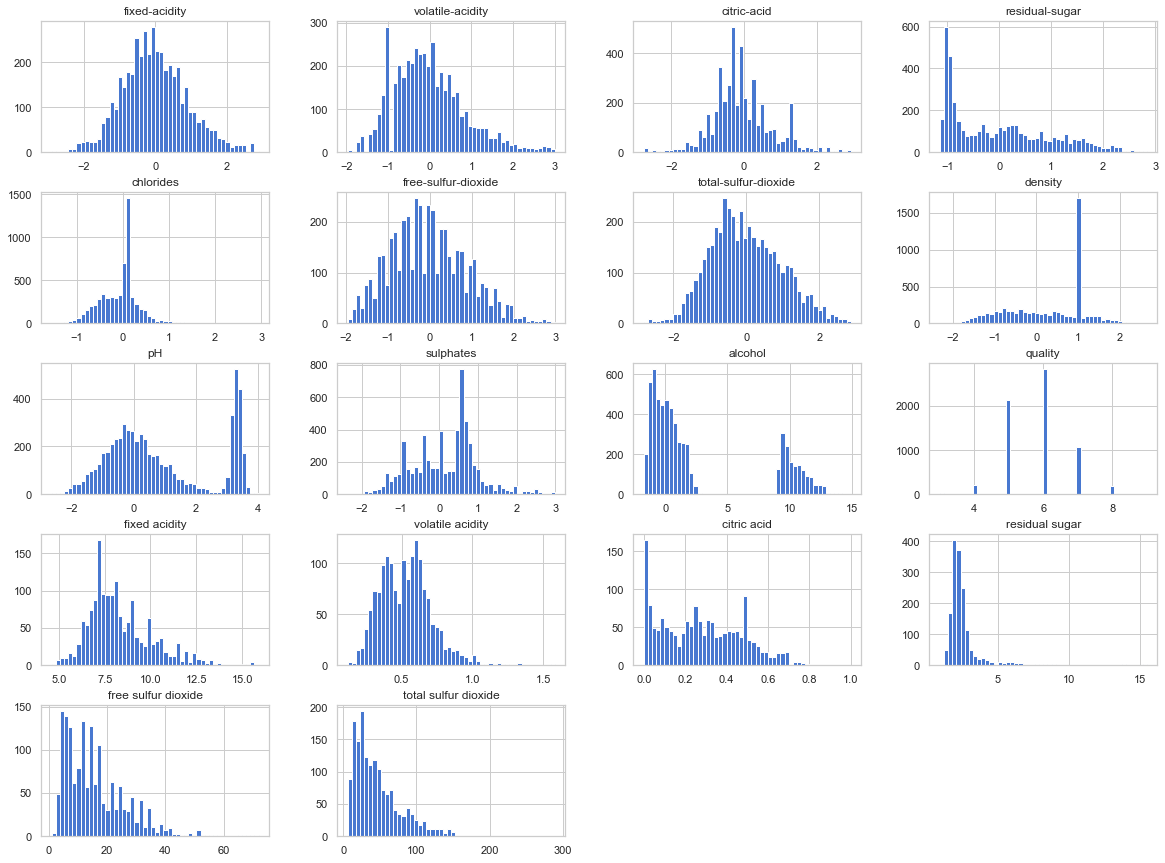

In [36]:
wine_df.hist(bins=50, figsize=(20, 15))
plt.show()